In [10]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

In [2]:
evergreen = pd.read_csv('../datasets/train.tsv', sep='\t', na_values='?')

# Extract the title and body from the boilerplate JSON text
evergreen['title'] = evergreen.boilerplate.map(lambda x: json.loads(x).get('title', ''))
evergreen['body'] = evergreen.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [7]:
evergreen = pd.get_dummies(evergreen, columns=['alchemy_category'])

In [9]:
evergreen.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category_score',
       u'avglinksize', u'commonlinkratio_1', u'commonlinkratio_2',
       u'commonlinkratio_3', u'commonlinkratio_4', u'compression_ratio',
       u'embed_ratio', u'framebased', u'frameTagRatio', u'hasDomainLink',
       u'html_ratio', u'image_ratio', u'is_news', u'lengthyLinkDomain',
       u'linkwordscore', u'news_front_page', u'non_markup_alphanum_characters',
       u'numberOfLinks', u'numwords_in_url', u'parametrizedLinkRatio',
       u'spelling_errors_ratio', u'label', u'title', u'body',
       u'alchemy_category_arts_entertainment', u'alchemy_category_business',
       u'alchemy_category_computer_internet',
       u'alchemy_category_culture_politics', u'alchemy_category_gaming',
       u'alchemy_category_health', u'alchemy_category_law_crime',
       u'alchemy_category_recreation', u'alchemy_category_religion',
       u'alchemy_category_science_technology', u'alchemy_category_sports',
       u'alchemy_category_u

In [14]:
evergreen['label'].describe()

count    7395.000000
mean        0.513320
std         0.499856
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

## Build a feature matrix where X contains useful features and y contains the target variable label

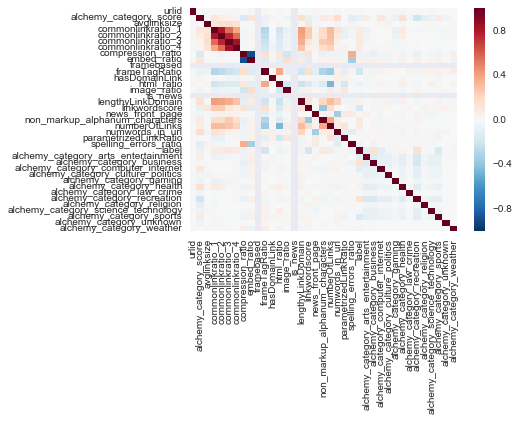

In [11]:
sb.heatmap(evergreen.corr())

## Build a Logistic Regression model using scikit-learn and then!¶
* Examine the coefficients using the examine_coefficients function provided
* Evaluate the AUC, precision and recall of the model using cross-validation
* Plot the ROC curve
* Iterate on the model by adding in additional features in X above

In [3]:
def examine_coefficients(model, df):
    return pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')

# Code from Richard

```
# To find accuracy!

logit = LogisticRegression()
model = logit.fit(x, y)
print model.score(x, y) # This is your accuracy!

from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix!

y_pred = model.predict(x)
confusion = np.array(confusion_matrix(y, y_pred)) 

# If you want a pretty confusion matrix:

conmat = np.array(confusion_matrix(y, y_pred))

confusion = pd.DataFrame(conmat, index=['Y=0', 'Y=1'],
                         columns=['Y-hat = 0', 'Y-hat = 1'])

# Precision and Recall!

classifcation_report(y, y_pred)
```